# NLP Application

In [2]:
# Thank you Selva Prabhakaran for uploading code to
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# Thank you to Professor Natesh Pillai and Correlation for Lecture Code


import nltk # imports the natural language toolkit
import pandas as pd
import numpy  as np
import string
import plotly
from nltk.stem import PorterStemmer 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
from pprint import pprint
import folium  #needed for interactive map
from folium.plugins import HeatMap
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


sns.set_style('whitegrid')

# Import Clean Dataset

In [3]:
df = pd.read_csv('C:/Users/Johnny/Documents/Classes/DS4A/Project/Datasets/master_df.csv')
df_copy = df.copy()

print(df.shape)
df.head()

(29745, 33)


C:\Users\Johnny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,civilians_name,civilians_age,civilians_gender,civilians_race,date,address,city,state,zip_code,...,threat_level,fleeing,body_cam,alleged_weapon,geography,criminal_charges,off_duty,month,day_of_week,civilians_age_group
0,0,Samuel H. Knapp,17.0,Male,European-American/White,2000-01-01,27898-27804 US-101,Willits,CA,95490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01,Saturday,"(0, 20]"
1,1,Mark A. Horton,21.0,Male,African-American/Black,2000-01-01,Davison Freeway,Detroit,MI,48203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01,Saturday,"(20, 40]"
2,2,Phillip A. Blurbridge,19.0,Male,African-American/Black,2000-01-01,Davison Freeway,Detroit,MI,48203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01,Saturday,"(0, 20]"
3,3,Mark Ortiz,23.0,Male,Hispanic/Latino,2000-01-01,600 W Cherry Ln,Carlsbad,NM,88220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01,Saturday,"(20, 40]"
4,4,LaTanya Janelle McCoy,24.0,Female,African-American/Black,2000-01-02,5700 block Mack Road,Sacramento,CA,95823.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01,Sunday,"(20, 40]"


# NLP Application

In [4]:
df.description[0]

'Samuel Knapp was allegedly driving a stolen vehicle when Deputies Scott Nording and Mike Davis started to pursue him. He crashed and was killed during the pursuit about 12:35 a.m.'

In [5]:
all_description = df.description
all_description.head()

0    Samuel Knapp was allegedly driving a stolen ve...
1    Two Detroit men killed when their car crashed ...
2    Two Detroit men killed when their car crashed ...
3    A motorcycle was allegedly being driven errati...
4    LaTanya Janelle McCoy's car was struck from be...
Name: description, dtype: object

In [6]:
# splits description into separate sentences
for sentence in nltk.sent_tokenize(all_description[1]):
    print(sentence)

Two Detroit men killed when their car crashed were among at least eight people who died in New Year's holiday weekend traffic accidents in Michigan, police said.
Mark A Horton, 21, and passenger Phillip A. Blurbridge, 19, were killed when their car crashed in their hometown at 1:54 a.m.
They were not wearing seat belts.
While these deaths were not reported in news media as police pursuit deaths, National Highway Traffic Safety Administration data shows police reported two people dying in a police pursuit at 1:54 a.m. on January 1, 2000, on Davison Freeway.
It was the only double fatality crash in Michigan that night.


In [7]:
# sentences contains all the separate sentences in description[1]
# word tokenizer splits the individual sentences into lists of words
sentences = nltk.sent_tokenize(all_description[1])
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

Two Detroit men killed when their car crashed were among at least eight people who died in New Year's holiday weekend traffic accidents in Michigan, police said.
['Two', 'Detroit', 'men', 'killed', 'when', 'their', 'car', 'crashed', 'were', 'among', 'at', 'least', 'eight', 'people', 'who', 'died', 'in', 'New', 'Year', "'s", 'holiday', 'weekend', 'traffic', 'accidents', 'in', 'Michigan', ',', 'police', 'said', '.']

Mark A Horton, 21, and passenger Phillip A. Blurbridge, 19, were killed when their car crashed in their hometown at 1:54 a.m.
['Mark', 'A', 'Horton', ',', '21', ',', 'and', 'passenger', 'Phillip', 'A.', 'Blurbridge', ',', '19', ',', 'were', 'killed', 'when', 'their', 'car', 'crashed', 'in', 'their', 'hometown', 'at', '1:54', 'a.m', '.']

They were not wearing seat belts.
['They', 'were', 'not', 'wearing', 'seat', 'belts', '.']

While these deaths were not reported in news media as police pursuit deaths, National Highway Traffic Safety Administration data shows police reporte

In [8]:
# get descriptions without nulls
all_description = all_description[all_description.notnull()]
# counts the words for each description case
word_lengths = all_description.apply(lambda x: len(nltk.word_tokenize(x)))

In [9]:
len(all_description)

29699

In [10]:
min(word_lengths), max(word_lengths)

(1, 454)

In [11]:
print(word_lengths[word_lengths==1].index)
print(word_lengths[word_lengths==454].index)

Int64Index([10901], dtype='int64')
Int64Index([12598], dtype='int64')


In [12]:
print(df.iloc[10901,:])
print(df.iloc[12598,:])

Unnamed: 0                                10901
civilians_name           Eric Lekendrick Manuel
civilians_age                              34.0
civilians_gender                           Male
civilians_race                              NaN
date                                 2010-03-20
address                     2609 Old Shell Road
city                                     Mobile
state                                        AL
zip_code                                36607.0
county                                   Mobile
latitude                              30.691596
longitude                            -88.101885
agency                 Mobile Police Department
cause_of_death                          Vehicle
use_of_force                            Pursuit
mental_illness                              NaN
year                                       2010
description                             Eufaula
fatal_id                                 8941.0
source                                  

In [13]:
print(all_description.iloc[10901])
print(all_description.iloc[12598])

Eufaula
Warren Deris was shot and killed while holding his wife at knifepoint when he allegedly aimed an air pistol at approaching officers. At around 5:50 p.m., a neighbor called police saying that Deris' daughter had come over and said her father's "just gone crazy. He's got knives out of the drawers. She's afraid." The dispatcher stated over the police radio that Deris was holding his wife inside the residence. Deputy Christopher Cade was the first on the scene, and he was soon joined by deputies Shane Rivolo and Christopher Bassil. Cade and Deris' daughter went to the side door under the carport; Rivolo went toward the back of the house. Deris' daughter tried to open the door, but it was locked, so she banged on it and demanded to be let in. Warren Deris reportedly came to the door and said "f-ya'll, I'm not going back to jail." Cade asked him to allow them to come inside. Deris responded "f-ya'll, ya'll not coming in here no," and raised his hand to show them what appeared to be a

<AxesSubplot:>

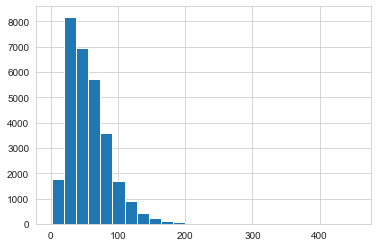

In [14]:
word_lengths.hist(bins = 25)

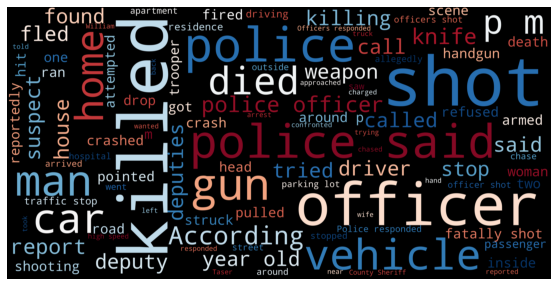

In [15]:
word_cloud_text = ' '.join(all_description)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",\
                          scale = 10,width=800, height=400, colormap='RdBu').generate(word_cloud_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
def word_cloud_state(data, state_value):

    data_filtered = data[data.state == state_value]
    descriptions = data_filtered.description

    descriptions_text = ' '.join(descriptions.values)

    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",\
                          scale = 10,width=800, height=400, colormap='RdBu').generate(descriptions_text)


    # Plotting the generated word cloud
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

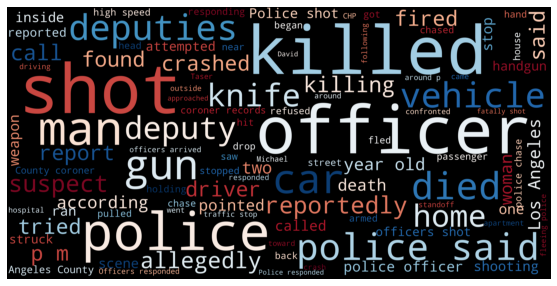

In [17]:
word_cloud_state(df[df.description.notnull()], 'CA')

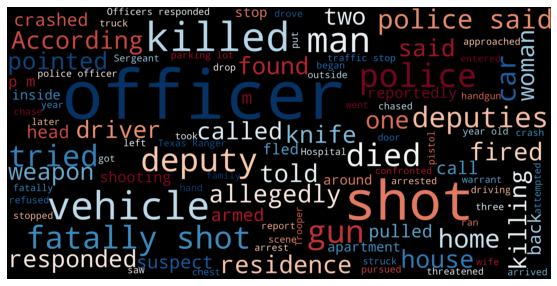

In [18]:
word_cloud_state(df[df.description.notnull()], 'TX')

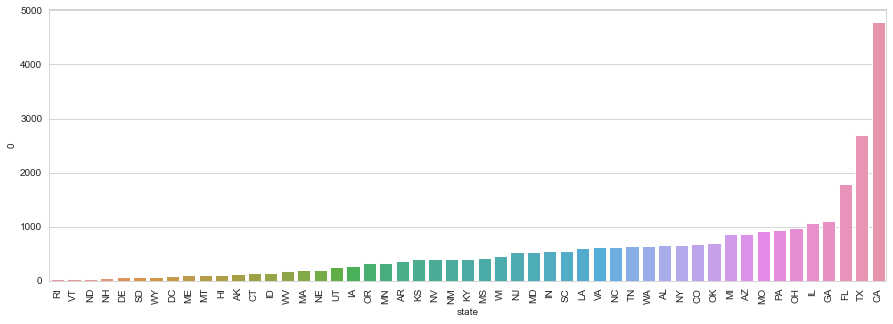

In [19]:
plt.subplots(figsize=(15,5))
sns.barplot(x=df.groupby('state').size().reset_index().sort_values(by=0)['state'], y=df.groupby('state').size().reset_index().sort_values(by=0)[0])
_=plt.xticks(rotation=90)

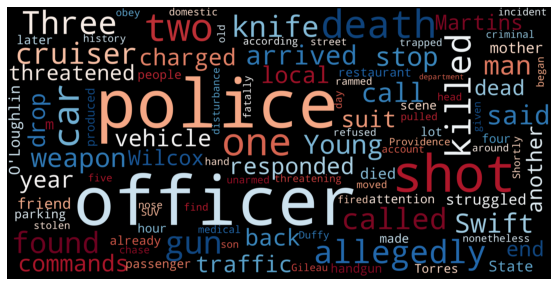

In [20]:
word_cloud_state(df[df.description.notnull()],'RI')

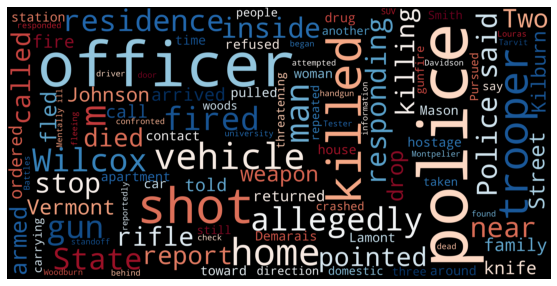

In [21]:
word_cloud_state(df[df.description.notnull()],'VT')

In [22]:
def word_cloud_cause_of_death(data, cod_value):

    data_filtered = data[data.cause_of_death == cod_value]
    descriptions = data_filtered.description

    descriptions_text = ' '.join(descriptions.values)

    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",\
                          scale = 10,width=800, height=400, colormap='RdBu').generate(descriptions_text)


    # Plotting the generated word cloud
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

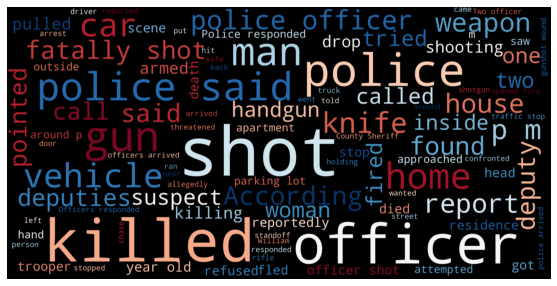

In [23]:
word_cloud_cause_of_death(df[df.description.notnull()],'Gunshot')

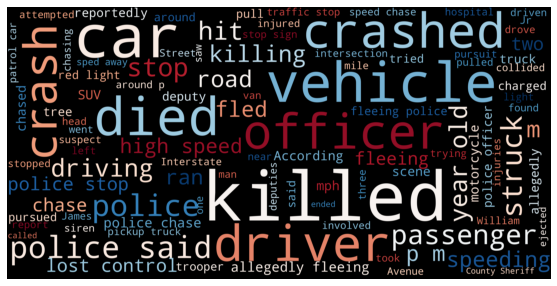

In [24]:
word_cloud_cause_of_death(df[df.description.notnull()],'Vehicle')

In [25]:
def word_cloud_age_group(data, cag_value):

    data_filtered = data[data.civilians_age_group == cag_value]
    descriptions = data_filtered.description

    descriptions_text = ' '.join(descriptions.values)

    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",\
                          scale = 10,width=800, height=400, colormap='RdBu').generate(descriptions_text)


    # Plotting the generated word cloud
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<AxesSubplot:xlabel='civilians_age', ylabel='Count'>

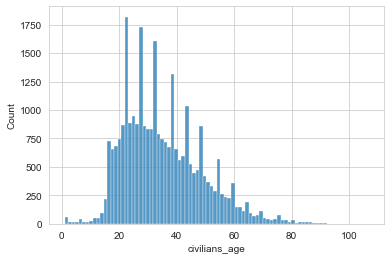

In [26]:
sns.histplot(df[df.civilians_age.notnull()].civilians_age)

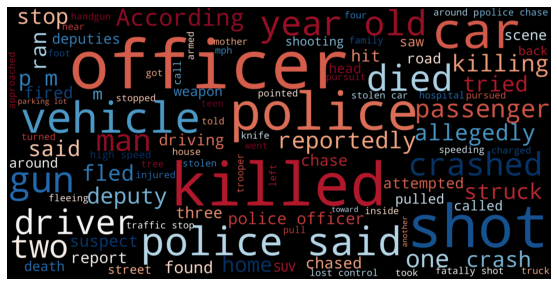

In [27]:
word_cloud_age_group(df[df.description.notnull()], '(0, 20]')

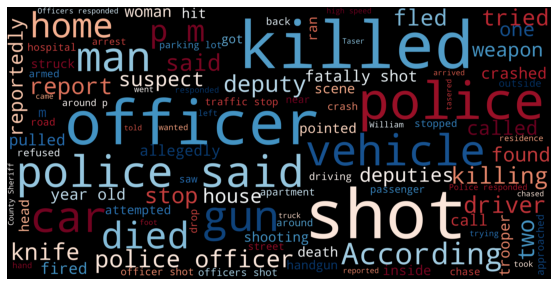

In [28]:
word_cloud_age_group(df[df.description.notnull()], '(20, 40]')

In [29]:
descriptions_containing_shot = [each for each in all_description if 'vehicle' in each]

for description in descriptions_containing_shot[:20]:
    shot_index = description.find('shot')
    print(description[shot_index-70:shot_index+70].replace('\n',''))




ast Woodall turned to confront police with his weapon and was fatally shot. His weapon was two screwdrivers taped together.
by a deputy when his vehicle lef
oyll died when a vehicle involved in police pursuit str

t of a strip mall, he refused to surrender. Instead, he reached for a shotgun on the passenger seat, which is when he was shot and killed.




ones to drop the knife, but he continued his advance, and one officer shot and killed him.
hen her car was struck by a ve
 came to a stop on surface streets, pulled a gun on officers, and was shot to death.
 Angeles Times: Officers were looking for suspects who had robbed and shot a woman. While on foot, an officer saw the vehicle driven by Freg


 work. Upon entering, Schoen, who was wearing a bulletproof vest, was shot in his arms, hands and face. Abdir went outside and killed Schoen



In [30]:
vec = CountVectorizer()

X = vec.fit_transform(all_description)

df_count = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

df_count.head()

,00,000,000gt,002549,006,00pm,01,02,0258,03,...,zutavern,zweiten,zwicky,zwolinski,zx1,zx1400e,zylstra,zyon,zyonne,zyskowski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
all_description_text = ' '.join(all_description)
tokenized_words = nltk.word_tokenize(all_description_text)
word_freq = Counter(tokenized_words)

len(word_freq)

40788

In [32]:
def top_k_grams(word_tokens,n,k):
    
    n_gram_list = list(ngrams(word_tokens,n))

    n_grams_strings = [' '.join(each) for each in n_gram_list]
    n_gram_counter = Counter(n_grams_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

In [33]:
top_1000_desc = all_description[0:1000]
all_description_text = ' '.join(top_1000_desc)

word_tokens = nltk.word_tokenize(all_description_text)

top_k_grams(word_tokens,1,10)

[('.', 2860), (',', 2622), ('a', 2097), ('the', 1830), ('and', 1699), ('to', 1117), ('was', 1108), ('in', 857), ('police', 769), ('of', 677)]


In [34]:
top_k_grams(word_tokens,2,10)

[('. The', 326), ('in the', 290), ('and killed', 271), ('shot and', 251), (', and', 249), ('with a', 187), ('in a', 180), ('. He', 171), ('. Police', 161), ('when he', 159)]


In [35]:
top_k_grams(word_tokens,3,10)

[('shot and killed', 235), (', police said', 101), ('was shot and', 101), ('police said .', 92), ('. According to', 85), ('. He was', 58), ('to police ,', 55), ('According to police', 54), ('when he allegedly', 54), ('and killed .', 53)]


In [36]:
stop_words = set(stopwords.words("english"))
without_stop_words = []
stopword = []
sentence = all_description[0]
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print(stopword)     
print()
print(without_stop_words)

['was', 'a', 'when', 'and', 'to', 'him', 'and', 'was', 'during', 'the', 'about']

['Samuel', 'Knapp', 'allegedly', 'driving', 'stolen', 'vehicle', 'Deputies', 'Scott', 'Nording', 'Mike', 'Davis', 'started', 'pursue', '.', 'He', 'crashed', 'killed', 'pursuit', '12:35', 'a.m', '.']


In [37]:
eng_stopwords = stopwords.words('english')

### Getting a single string
all_desc_text = ' '.join(top_1000_desc)

## Splitting them into tokens
word_tokens = nltk.word_tokenize(all_desc_text)

## Removing the stopwords
word_tokens_clean = [each for each in word_tokens if each.lower() not in eng_stopwords and len(each.lower()) > 2]

## Calling the function for top k
top_k_grams(word_tokens_clean, 3, 10)

[('officers shot killed', 20), ('officer shot killed', 13), ('according Los Angeles', 13), ('Los Angeles County', 13), ('Angeles County coroner', 13), ('County coroner records', 13), ('police said Police', 12), ('ran red light', 12), ('shot killed police', 10), ('officer fatally shot', 10)]


In [38]:
# Following code grabbed from:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# we will use it in our context to create some visualizations.
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

police 31477
shot 20720
officers 16957
killed 15007
officer 13323
said 9526
man 8212
car 7836
vehicle 6611
gun 6478
allegedly 6090
deputies 5251
home 4845
died 4835
deputy 4440
fired 4276
stop 4256
reportedly 4061
responded 3838
chase 3740


<AxesSubplot:title={'center':'Top 20 words from all description'}, xlabel='DescriptionText'>

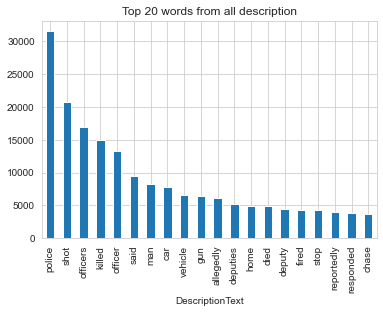

In [39]:
# We start by getting a list of the most common words.

common_words = get_top_n_words(all_description, 20,1)
for word, freq in common_words:
    print(word, freq)
df_desc = pd.DataFrame(common_words, columns = ['DescriptionText' , 'count'])
df_desc.groupby('DescriptionText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from all description')


police 3607
shot 3267
officers 2400
killed 2394
officer 1527
man 1375
car 1052
said 1014
deputies 981
gun 890
died 820
allegedly 811
vehicle 670
deputy 643
reportedly 598
chase 573
knife 500
home 469
responded 461
fired 438


<AxesSubplot:title={'center':'Top 20 words from California Descriptions'}, xlabel='CalDescText'>

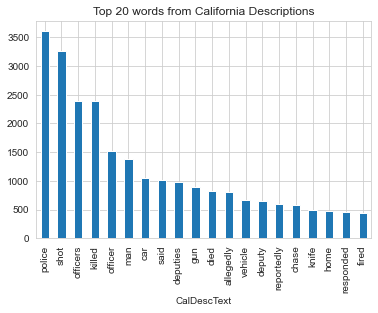

In [40]:
# We continue by splitting according to good/bad review scores, then grabbing again.

CalInd = df['state'] == 'CA'
CalDesc = df[CalInd]
TXInd = df['state'] == 'TX'
TXDesc = df[TXInd]

common_words = get_top_n_words(CalDesc[CalDesc.description.notnull()].description, 20)
for word, freq in common_words:
    print(word, freq)
df_common_words_CA = pd.DataFrame(common_words, columns = ['CalDescText' , 'count'])
df_common_words_CA.groupby('CalDescText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from California Descriptions')

shot 2160
officers 2146
officer 1793
police 1712
vehicle 872
killed 869
man 772
deputy 605
fatally 603
said 601
gun 578
responded 573
deputies 534
died 513
tried 487
stop 419
allegedly 417
car 380
called 359
home 321


<AxesSubplot:title={'center':'Top 20 words from Texas Descriptions'}, xlabel='TXDescText'>

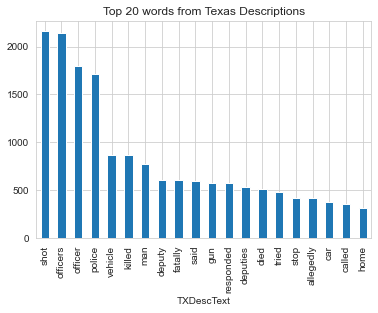

In [41]:
common_words = get_top_n_words(TXDesc[TXDesc['description'].notnull()].description, 20)
for word, freq in common_words:
    print(word, freq)
df_common_words_TX = pd.DataFrame(common_words, columns = ['TXDescText' , 'count'])
df_common_words_TX.groupby('TXDescText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from Texas Descriptions')

shot killed 591
fatally shot 468
police said 331
officers responded 176
officers shot 158
year old 154
officer shot 152
traffic stop 143
parking lot 113
texas ranger 111
drove away 89
pronounced dead 89
fleeing police 82
allegedly fleeing 80
police responded 78
police stop 77
police officer 76
ranger division 76
division investigated 73
stun gun 73


<AxesSubplot:title={'center':'Top 20 bigrams from Texas Descriptions'}, xlabel='TXDescText'>

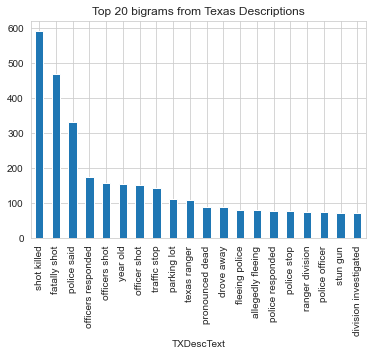

In [42]:
# Get top bigrams and trigrams from bad reviews
common_words = get_top_n_words(TXDesc[TXDesc['description'].notnull()].description, 20,2)

for word, freq in common_words:
    print(word, freq)

df_common_words_TX = pd.DataFrame(common_words, columns = ['TXDescText' , 'count'])
df_common_words_TX.groupby('TXDescText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from Texas Descriptions')

los angeles county 208
according los angeles 201
angeles county coroner 195
county coroner records 194
police shot killed 166
officers shot killed 156
officer shot killed 128
high speed chase 91
deputies shot killed 76
deputy shot killed 75
shot killed man 64
details precipitated killing 62
precipitated killing withheld 61
killing withheld police 60
reported la times 59
male died shot 57
shot killed police 56
man shot killed 53
police said man 51
year old latino 44


<AxesSubplot:title={'center':'Top 20 trigrams from California Descriptions'}, xlabel='CalDescText'>

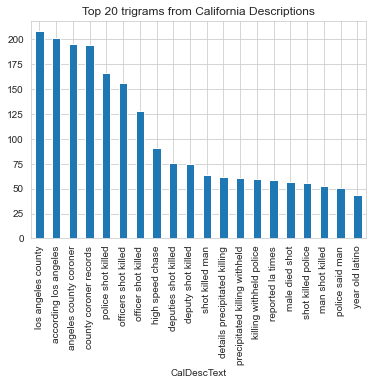

In [43]:
# Get top bigrams and trigrams from bad reviews
common_words = get_top_n_words(CalDesc[CalDesc['description'].notnull()].description, 20,3)

for word, freq in common_words:
    print(word, freq)

df_common_words_CA = pd.DataFrame(common_words, columns = ['CalDescText' , 'count'])
df_common_words_CA.groupby('CalDescText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from California Descriptions')

officers shot killed 82
texas ranger division 76
allegedly fleeing police 76
fleeing police stop 75
ranger division investigated 73
officer shot killed 69
officers fatally shot 63
police shot killed 43
officer fatally shot 38
conducted traffic stop 34
county sheriff office 33
police said officers 32
information comes usa 31
comes usa today 31
usa today december 31
today december 2016 31
december 2016 fatal 31
2016 fatal pursuits 31
fatal pursuits project 31
fatal encounters supporting 29


<AxesSubplot:title={'center':'Top 20 trigrams from Texas Descriptions'}, xlabel='TXDescText'>

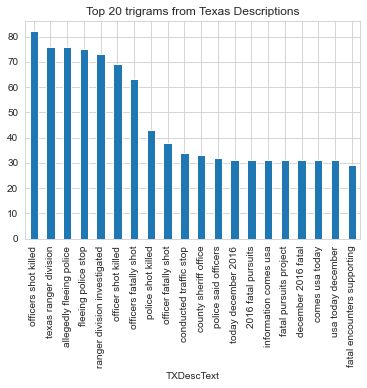

In [44]:
# Get top bigrams and trigrams from bad reviews
common_words = get_top_n_words(TXDesc[TXDesc['description'].notnull()].description, 20,3)

for word, freq in common_words:
    print(word, freq)

df_common_words_TX = pd.DataFrame(common_words, columns = ['TXDescText' , 'count'])
df_common_words_TX.groupby('TXDescText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from Texas Descriptions')

<AxesSubplot:xlabel='month_name'>

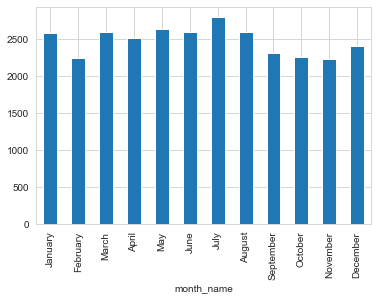

In [45]:
df['month_name'] = pd.to_datetime(df.month).dt.month_name()

df.groupby(df['month_name'], sort=False)['month_name'].size().plot(kind='bar')

<AxesSubplot:xlabel='month_name'>

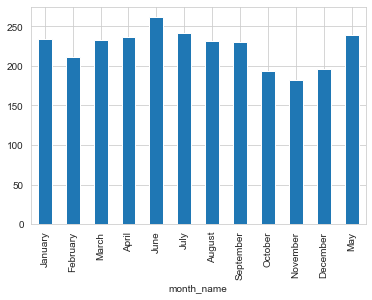

In [46]:
df_TX = df[df.state == 'TX']
df_TX.sort_values(by='month').groupby(df_TX['month_name'], sort=False)['month_name'].size().plot(kind='bar')

In [47]:
df_wash = pd.read_csv('C:/Users/Johnny/Documents/Classes/DS4A/Project/Datasets/shootings_wash_post.csv')
df_wash_copy = df_wash.copy()

print(df_wash.shape)
df_wash.head()

(5552, 14)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


C:\Users\Johnny\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='flee', ylabel='count'>

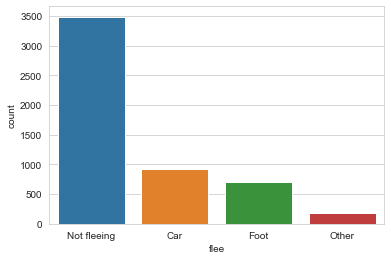

In [48]:
sns.countplot(df_wash[df_wash.flee.notnull()].flee)

# ---------------------------------------------------------

In [49]:
stop_words = stopwords.words('english')

In [50]:
# Convert to list
data = all_description.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S\s?','', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['Samuel Knapp was allegedly driving a stolen vehicle when Deputies Scott Nording and Mike Davis started to pursue him. He crashed and was killed during the pursuit about 12:35 a.m.']


In [51]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))

data_words = list(sent_to_words(data))

In [52]:
print(data_words[:1])

[['samuel', 'knapp', 'was', 'allegedly', 'driving', 'stolen', 'vehicle', 'when', 'deputies', 'scott', 'nording', 'and', 'mike', 'davis', 'started', 'to', 'pursue', 'him', 'he', 'crashed', 'and', 'was', 'killed', 'during', 'the', 'pursuit', 'about']]


In [53]:
bigram = gensim.models.Phrases(data_words,min_count = 5, threshold = 100)

trigram = gensim.models.Phrases(bigram[data_words], threshold = 100)

In [54]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram_mod = gensim.models.phrases.Phraser(trigram)

In [55]:
# Important Functions that cleans the data

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [56]:
data_words_nostops = remove_stopwords(data_words)

In [57]:
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser','ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

In [58]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [59]:
SOME_FIXED_SEED = 0

# before training/inference:
np.random.seed(SOME_FIXED_SEED)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [60]:
lda_model.print_topics()

[(0,
  '0.156*"officer" + 0.075*"shoot" + 0.056*"deputy" + 0.037*"allegedly" + 0.034*"respond" + 0.034*"reportedly" + 0.032*"gun" + 0.028*"report" + 0.026*"fire" + 0.017*"try"'),
 (1,
  '0.101*"vehicle" + 0.075*"car" + 0.065*"driver" + 0.060*"stop" + 0.044*"flee" + 0.044*"crash" + 0.035*"drive" + 0.035*"chase" + 0.022*"traffic" + 0.021*"steal"'),
 (2,
  '0.072*"call" + 0.059*"home" + 0.054*"find" + 0.045*"woman" + 0.025*"go" + 0.022*"come" + 0.022*"knife" + 0.021*"dead" + 0.020*"threaten" + 0.019*"unidentified"'),
 (3,
  '0.089*"die" + 0.035*"road" + 0.031*"hospital" + 0.025*"tree" + 0.024*"light" + 0.023*"self_inflicte" + 0.022*"take" + 0.021*"release" + 0.019*"travel" + 0.019*"injury"'),
 (4,
  '0.177*"police" + 0.131*"man" + 0.120*"kill" + 0.070*"say" + 0.033*"shot" + 0.024*"arrive" + 0.019*"person" + 0.018*"attempt" + 0.017*"suspect" + 0.015*"get"')]

__Topic 1:(Largest Topic)__<br>
Officer responding and ending with a shooting<br>
__Topic 2:__<br>
Death involving vehicle chase<br>
__Topic 3:__<br>
Officer responding to a home situation<br>
__Topic 4:__<br>
Situation where civilian was injured and died on the way to hosiptal<br>
__Topic 5:(Smallest Topic)__<br>
Officer responding to his own suspcions

In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.137666  0.281510       1        1  33.811050
4     -0.179260 -0.353473       2        1  28.799775
2      0.380983 -0.071029       3        1  16.274572
1     -0.147360  0.041014       4        1  14.917782
3      0.083304  0.101978       5        1   6.196821, topic_info=         Term          Freq         Total Category  logprob  loglift
25     police  29090.000000  29090.000000  Default  30.0000  30.0000
57    officer  30191.000000  30191.000000  Default  29.0000  29.0000
20        man  21473.000000  21473.000000  Default  28.0000  28.0000
4        kill  19666.000000  19666.000000  Default  27.0000  27.0000
8     vehicle   8562.000000   8562.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1092   detain    213.871369    214.613463   Topic5  -5.1086   2.7777
1317    taser    392.588320    424.557055   Topic5  -4.5012   2.7028
159      take    764.807718   2313.368862   Topic5  -3.8344   1.6743
13      death    377.350875    809.782769   Topic5  -4.5408   2.0175
45      later    471.336985   2070.278312   Topic5  -4.3184   1.3013

[205 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
129       1  0.999775     accord
0         1  0.930622  allegedly
0         4  0.069282  allegedly
498       2  0.998869       also
311       3  0.999527  apartment
...     ...       ...        ...
165       1  0.999497     weapon
424       5  0.996949      white
6084      2  0.999717   withhold
176       3  0.999738      woman
200       2  0.999624   year_old

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

In [62]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.512828027588675


In [63]:
stop_words = stopwords.words('english')
stop_words.extend(['police', 'officers','officer', 'kill','killed', 'deputy','die','died','allegedly','go','take', 'say', 'deputy'])

In [64]:
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser','ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

data_lemmatized = remove_stopwords(data_lemmatized)

In [65]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [66]:
SOME_FIXED_SEED = 0

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [67]:
lda_model.print_topics()

[(0,
  '0.031*"arrest" + 0.020*"use" + 0.018*"charge" + 0.013*"hand" + 0.013*"death" + 0.012*"hospital" + 0.011*"appear" + 0.011*"withhold" + 0.010*"store" + 0.010*"include"'),
 (1,
  '0.069*"vehicle" + 0.052*"car" + 0.045*"driver" + 0.041*"stop" + 0.031*"crash" + 0.031*"flee" + 0.024*"drive" + 0.023*"pull" + 0.022*"chase" + 0.017*"try"'),
 (2,
  '0.087*"man" + 0.056*"shoot" + 0.025*"call" + 0.022*"shot" + 0.021*"gun" + 0.021*"home" + 0.019*"find" + 0.019*"respond" + 0.018*"report" + 0.018*"fire"')]

__Topic 1:(Largest Topic)__<br>
Officer responding to a traffic stop<br>
__Topic 2:__ <br>
Officer responding to a home situation<br>
__Topic 3:(Smallest Topic)__<br>
Officer responding to his own suspcions or incident

In [68]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.203694  0.247527       1        1  53.007322
1     -0.139099 -0.280707       2        1  28.074281
0      0.342792  0.033180       3        1  18.918397, topic_info=        Term          Freq         Total Category  logprob  loglift
16       man  20830.000000  20830.000000  Default  30.0000  30.0000
5    vehicle   8854.000000   8854.000000  Default  29.0000  29.0000
41     shoot  13509.000000  13509.000000  Default  28.0000  28.0000
8        car   6599.000000   6599.000000  Default  27.0000  27.0000
29    driver   5707.000000   5707.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
508      may    490.314918    591.521595   Topic3  -5.1656   1.4774
700    fight    610.399420   1146.953090   Topic3  -4.9465   1.0343
794  release    457.800955    685.689907   Topic3  -5.2342   1.2610
160      try    522.878025   4515.426961   Topic3  -5.1013  -0.4909
38     later    485.717896   1913.252252   Topic3  -5.1750   0.2941

[148 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
119       1  0.826606     accord
119       2  0.168707     accord
119       3  0.004514     accord
296       1  0.999285  apartment
296       3  0.000673  apartment
...     ...       ...        ...
5933      1  0.001088   withhold
5933      3  0.998669   withhold
379       3  0.999528    witness
163       1  0.999788      woman
163       3  0.000256      woman

[215 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [69]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5335090965627204


From this analysis we can see that there is 3 types of situations that involves civilians being killed. The setting tends to happen at traffic stops or on roads, home or residencies, and incidents such as burglary or arrests.

# Filter to Get More Insights

In [70]:
df.isna().sum()

Unnamed: 0                 0
civilians_name             0
civilians_age           1182
civilians_gender         107
civilians_race          9007
date                       0
address                  602
city                      37
state                      0
zip_code                 240
county                    62
latitude                1147
longitude               1147
agency                   115
cause_of_death             0
use_of_force            1197
mental_illness          4990
year                       0
description               46
fatal_id                  70
source                     0
wash_id                28612
mpv_id                 28637
threat_level           28611
fleeing                28669
body_cam               28633
alleged_weapon         28598
geography              28654
criminal_charges       28637
off_duty               29738
month                      0
day_of_week                0
civilians_age_group     1308
month_name                 0
dtype: int64

In [71]:
df.cause_of_death.unique()

array(['Vehicle', 'Gunshot', 'Beaten', 'Stabbed',
       'Asphyxiated/Restrained', 'Drowned', 'Drug overdose',
       'Fell from a height', 'Undetermined',
       'Chemical agent/Pepper spray', 'Medical emergency', 'Other',
       'Burned/Smoke inhalation', 'Tasered'], dtype=object)

In [72]:
stop_words = stopwords.words('english')
stop_words.extend(['police', 'officers','officer', 'kill','killed', 'deputy','die','died','allegedly','go','take', 'say', 'deputy'])

In [73]:
data_gunshot = df[(df['cause_of_death']=='Gunshot') & (df.description.notnull())].description.values.tolist()
data_vehicle = df[(df['cause_of_death']=='Vehicle') & (df.description.notnull())].description.values.tolist()

data_gunshot_words = list(sent_to_words(data_gunshot))
data_vehicle_words = list(sent_to_words(data_vehicle))

In [74]:
data_gunshot_words_nostops = remove_stopwords(data_gunshot_words)

data_gunshot_words_bigrams = make_bigrams(data_gunshot_words_nostops)

nlp = spacy.load('en', disable=['parser','ner'])

data_lemmatized = lemmatization(data_gunshot_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

data_lemmatized = remove_stopwords(data_gunshot_words)

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

SOME_FIXED_SEED = 0

# before training/inference:
np.random.seed(SOME_FIXED_SEED)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [75]:
lda_model.print_topics()

[(0,
  '0.056*"shot" + 0.024*"old" + 0.024*"year" + 0.021*"county" + 0.017*"details" + 0.016*"killing" + 0.015*"withheld" + 0.015*"sheriff" + 0.013*"precipitated" + 0.012*"fatally"'),
 (1,
  '0.035*"vehicle" + 0.026*"car" + 0.023*"shot" + 0.015*"suspect" + 0.015*"driver" + 0.014*"stop" + 0.012*"pulled" + 0.012*"got" + 0.011*"two" + 0.011*"fled"'),
 (2,
  '0.075*"man" + 0.039*"shot" + 0.026*"said" + 0.021*"deputies" + 0.021*"home" + 0.020*"gun" + 0.016*"responded" + 0.015*"found" + 0.013*"inside" + 0.013*"reportedly"')]

In [76]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.211068  0.204402       1        1  49.041216
1     -0.101141 -0.258762       2        1  29.002449
0      0.312209  0.054359       3        1  21.956334, topic_info=         Term          Freq         Total Category  logprob  loglift
147       man  19444.000000  19444.000000  Default  30.0000  30.0000
130   vehicle   5394.000000   5394.000000  Default  29.0000  29.0000
35        car   3953.000000   3953.000000  Default  28.0000  28.0000
149       old   2813.000000   2813.000000  Default  27.0000  27.0000
156      year   2786.000000   2786.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
867   wounded    562.289982    597.190125   Topic3  -5.3358   1.4559
89    killing   1824.310718   2714.702767   Topic3  -4.1589   1.1186
486      duty    597.796397    706.989734   Topic3  -5.2746   1.3483
11       shot   6565.886666  20409.159689   Topic3  -2.8782   0.3820
58   shooting   1245.693619   2221.149103   Topic3  -4.5404   0.9378

[151 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
751       3  0.998768      agent
33        2  0.002196     agents
33        3  0.999133     agents
1877      3  0.999174   although
266       1  0.999472  apartment
...     ...       ...        ...
154       1  0.999614      woman
154       3  0.000306      woman
867       2  0.058608    wounded
867       3  0.941074    wounded
156       3  0.999879       year

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [77]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4567771724091439


## Residences

In [78]:
df_home = df[(df.description.notnull()) & (df.description.str.contains('home'))]

In [79]:
# Convert to list
data_home = df_home.description.values.tolist()

# Remove Emails
data_home = [re.sub('\S*@\S\s?','', sent) for sent in data_home]

# Remove new line characters
data_home = [re.sub('\s+', ' ', sent) for sent in data_home]

# Remove distracting single quotes
data_home = [re.sub("\'", "", sent) for sent in data_home]

stop_words = stopwords.words('english')
stop_words.extend(['police', 'officers','officer', 'kill','killed', 'deputy','die','died','allegedly','go','take', 'say', 'deputy'])

data_home_words = list(sent_to_words(data_home))

data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser','ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

data_lemmatized = remove_stopwords(data_lemmatized)

In [80]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

SOME_FIXED_SEED = 0

# before training/inference:
np.random.seed(SOME_FIXED_SEED)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [81]:
lda_model.print_topics()

[(0,
  '0.284*"man" + 0.070*"gun" + 0.028*"people" + 0.026*"come" + 0.024*"point" + 0.023*"weapon" + 0.022*"unidentified" + 0.020*"apartment" + 0.019*"tell" + 0.014*"order"'),
 (1,
  '0.086*"vehicle" + 0.064*"car" + 0.055*"driver" + 0.051*"stop" + 0.038*"crash" + 0.038*"flee" + 0.030*"drive" + 0.028*"pull" + 0.027*"chase" + 0.022*"attempt"'),
 (2,
  '0.086*"shoot" + 0.039*"call" + 0.035*"reportedly" + 0.033*"shot" + 0.029*"find" + 0.029*"respond" + 0.027*"report" + 0.027*"fire" + 0.025*"woman" + 0.023*"arrive"'),
 (3,
  '0.052*"involve" + 0.042*"charge" + 0.040*"spot" + 0.036*"start" + 0.027*"subject" + 0.027*"light" + 0.019*"cause" + 0.019*"mile" + 0.015*"husband" + 0.014*"connection"'),
 (4,
  '0.089*"home" + 0.029*"armed" + 0.026*"arrest" + 0.024*"detail" + 0.020*"residence" + 0.018*"year_old" + 0.017*"drop" + 0.016*"attempt" + 0.016*"fight" + 0.014*"standoff"')]

In [82]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.324299 -0.174259       1        1  39.007687
1      0.174719  0.140442       2        1  22.471361
0     -0.245363 -0.293549       3        1  16.319123
4     -0.119621  0.265482       4        1  16.036033
3     -0.134034  0.061884       5        1   6.165796, topic_info=           Term          Freq         Total Category  logprob  loglift
16          man  21040.000000  21040.000000  Default  30.0000  30.0000
41        shoot  15210.000000  15210.000000  Default  29.0000  29.0000
5       vehicle   8731.000000   8731.000000  Default  28.0000  28.0000
59         home   6510.000000   6510.000000  Default  27.0000  27.0000
8           car   6508.000000   6508.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
928        lane    234.850680    235.607210   Topic5  -4.7805   2.7829
360    homicide    226.533397    227.284825   Topic5  -4.8166   2.7828
1304  detective    210.022157    210.770773   Topic5  -4.8923   2.7826
358       count    181.651125    182.394650   Topic5  -5.0374   2.7821
908      church    180.896512    181.652095   Topic5  -5.0416   2.7820

[194 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6         5  0.998987    accident
119       1  0.999770      accord
68        3  0.998617       agent
296       3  0.999392   apartment
52        4  0.998856  apparently
...     ...       ...         ...
379       3  0.996762     witness
163       1  0.999722       woman
469       3  0.997723       would
186       2  0.318940    year_old
186       4  0.680441    year_old

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

In [83]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43508516335114245


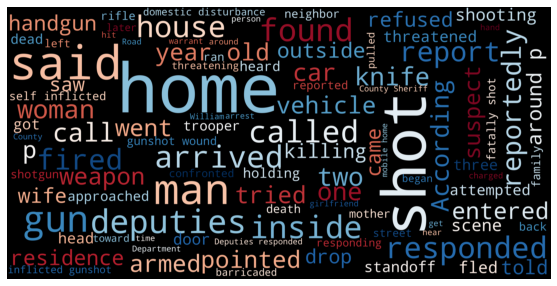

In [84]:
word_cloud_text = ' '.join(df_home.description)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",\
                          scale = 10,width=800, height=400, colormap='RdBu',stopwords=stop_words).generate(word_cloud_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
data_vehicle_words_nostops = remove_stopwords(data_vehicle_words)

data_vehicle_words_bigrams = make_bigrams(data_vehicle_words_nostops)

nlp = spacy.load('en', disable=['parser','ner'])

data_lemmatized = lemmatization(data_vehicle_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# before training/inference:
np.random.seed(SOME_FIXED_SEED)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=0,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)



In [87]:
lda_model.print_topics()

[(0,
  '0.064*"vehicle" + 0.053*"driver" + 0.051*"crash" + 0.049*"car" + 0.037*"stop" + 0.034*"flee" + 0.029*"say" + 0.028*"drive" + 0.024*"chase" + 0.021*"speed"'),
 (1,
  '0.042*"charge" + 0.034*"call" + 0.027*"respond" + 0.026*"find" + 0.021*"fire" + 0.020*"catch" + 0.017*"cause" + 0.016*"murder" + 0.016*"speeding" + 0.012*"count"'),
 (2,
  '0.032*"hit" + 0.029*"run" + 0.027*"turn" + 0.023*"pull" + 0.022*"road" + 0.020*"go" + 0.020*"tree" + 0.018*"year_old" + 0.018*"see" + 0.015*"take"')]

In [88]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.291442  0.143770       1        1  60.183717
2     -0.004794 -0.294876       2        1  26.229092
1     -0.286648  0.151106       3        1  13.587192, topic_info=             Term         Freq        Total Category  logprob  loglift
6         vehicle  3485.000000  3485.000000  Default  30.0000  30.0000
0           crash  2802.000000  2802.000000  Default  29.0000  29.0000
9             car  2643.000000  2643.000000  Default  28.0000  28.0000
52         charge   520.000000   520.000000  Default  27.0000  27.0000
40           flee  1826.000000  1826.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1952  immediately    70.130079    70.949237   Topic3  -5.1663   1.9844
1075        siren    72.117671    73.074565   Topic3  -5.1383   1.9829
1302        white    84.592558    86.144962   Topic3  -4.9788   1.9779
83         nearby    68.911748    69.784869   Topic3  -5.1838   1.9835
51         arrest    69.299200   207.010073   Topic3  -5.1782   0.9017

[150 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
197       1  0.168122    accord
197       2  0.833140    accord
302       3  0.995720    allege
244       1  0.997667      also
514       2  0.998499    around
...     ...       ...       ...
1302      3  0.986709     white
243       1  0.996859     woman
31        3  0.992450      year
101       1  0.110037  year_old
101       2  0.888599  year_old

[148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])